In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.3.1


In [2]:
import pathlib

data_dir = pathlib.Path("Images/Classification/")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

21


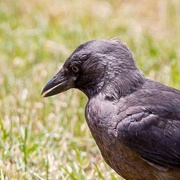

In [3]:
goose_data = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(goose_data[13]))

In [4]:
batch_size = 20
img_height = 180
img_width = 180

In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r"./Images/Classification",
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 32 files belonging to 2 classes.


In [6]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   r"./Images/Classification",
#   validation_split=0.00,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   color_mode='rgb',
#   batch_size=batch_size)

Found 32 files belonging to 2 classes.
Using 6 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Goose', 'non-goose']


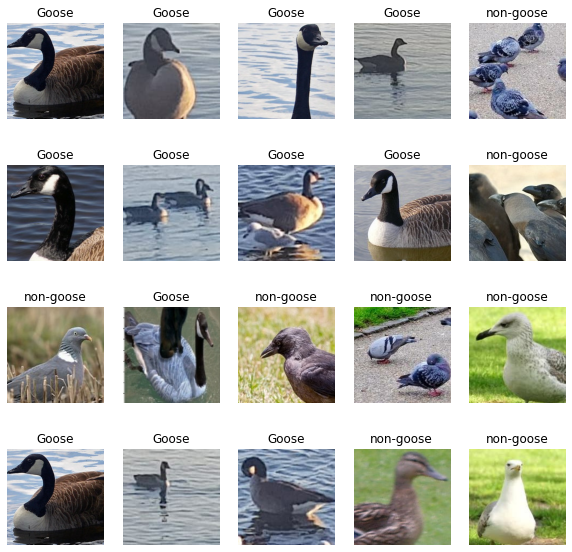

In [8]:
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    rows = math.floor(np.sqrt(image_count))
    cols = math.ceil(np.sqrt(image_count))
    for i in range(len(images)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

0.0 1.0


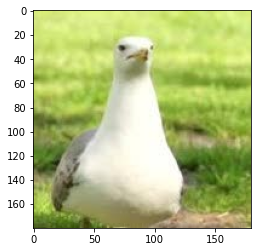

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

plt.imshow(first_image)

In [11]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [28]:
model.fit(
  train_ds,
  epochs=20
)

Epoch 1/20
2/2 [==============================] - 0s 134ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 108ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 108ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 116ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 113ms/step - loss: 8.5167e-04 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 110ms/step - loss: 7.5837e-04 - accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 113ms/step - loss: 4.9956e-04 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 0s 133ms/step - loss: 3.4401e-04 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 0s 117ms/step - loss: 3.2996e-04 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 0s 131ms/step - loss: 3.2879e-04 - accuracy: 1.

In [35]:
# model.save_weights('config/goose.weights')
model.save('config/goose_model')

# Test the model

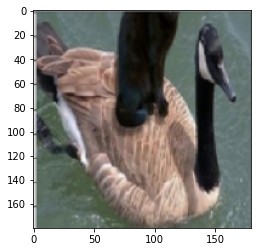

In [38]:
import cv2
test_img = cv2.imread('./Images/Classification/Goose/totallynotcheating.jpg')
plt.imshow(test_img)

In [39]:
modelinput = tf.expand_dims(test_img, axis=0)
predictions = model.predict(modelinput)
print(predictions[0])
print(f"Class: {np.argmax(predictions[0])}")

[ 1.0427263 -3.9968536]
Class: 0
